## Model Training and Evaluation

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [61]:
# Load encoded data
df_model = pd.read_csv('data/processed/model_employee_data.csv')

# Split features and target
X = df_model.drop('PerformanceRating', axis=1)
y = df_model['PerformanceRating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [62]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
import joblib

# Save the scaler used for training
joblib.dump(scaler, 'scaler.pkl')

print("Scaler saved successfully.")

Scaler saved successfully.


In [63]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_scaled, y_train
)

# Check new class distribution
pd.Series(y_train_resampled).value_counts()

PerformanceRating
3    699
2    699
4    699
Name: count, dtype: int64

In [64]:
X_train_resampled.shape

(2097, 27)

In [65]:
y_train_resampled.shape

(2097,)

In [66]:
X_test_scaled.shape

(240, 27)

In [67]:
y_test.shape

(240,)

### Note

__The encoded dataset was split into training and testing sets to evaluate model performance on unseen data while preserving class distribution.__

### LOGISTIC REGRESSION

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)

# Train model on SMOTE-resampled data
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

print("\nClassification Report:\n")
log_lr=print(classification_report(y_test, y_pred_lr))
log_lr

Logistic Regression Accuracy: 0.7458333333333333

Classification Report:

              precision    recall  f1-score   support

           2       0.48      0.77      0.59        39
           3       0.91      0.75      0.82       175
           4       0.55      0.69      0.61        26

    accuracy                           0.75       240
   macro avg       0.64      0.74      0.67       240
weighted avg       0.80      0.75      0.76       240



__Insight for Logistic Regression__

Logistic Regression was used as a baseline model. While it provided reasonable performance after scaling and SMOTE, its linear nature limited its ability to capture complex patterns in employee performance data.

## SVC

In [69]:
from sklearn.svm import SVC
# Initialize SVC
svc_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

# Train model on SMOTE-resampled data
svc_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_svc = svc_model.predict(X_test_scaled)

# Evaluation
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

print("\nClassification Report:\n")
svc_clf=print(classification_report(y_test, y_pred_svc))
svc_clf

SVC Accuracy: 0.8416666666666667

Classification Report:

              precision    recall  f1-score   support

           2       0.69      0.64      0.67        39
           3       0.88      0.91      0.90       175
           4       0.74      0.65      0.69        26

    accuracy                           0.84       240
   macro avg       0.77      0.74      0.75       240
weighted avg       0.84      0.84      0.84       240



__Insight for Support Vector Classifier (SVC)__

SVC demonstrated improved performance over baseline models by effectively modeling non-linear decision boundaries. Feature scaling and SMOTE contributed to balanced class-wise predictions, though computational complexity was higher.

## GaussianNB

In [70]:
from sklearn.naive_bayes import GaussianNB
# Initialize Gaussian Naive Bayes
gnb_model = GaussianNB()

# Train model on SMOTE-resampled data
gnb_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_gnb = gnb_model.predict(X_test_scaled)

# Evaluation
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))

print("\nClassification Report:\n")
gb_clf=print(classification_report(y_test, y_pred_gnb))
gb_clf

GaussianNB Accuracy: 0.7875

Classification Report:

              precision    recall  f1-score   support

           2       0.62      0.67      0.64        39
           3       0.89      0.82      0.85       175
           4       0.53      0.73      0.61        26

    accuracy                           0.79       240
   macro avg       0.68      0.74      0.70       240
weighted avg       0.81      0.79      0.79       240



__Insight for GaussianNB__

Gaussian Naive Bayes offered fast and simple predictions but showed lower accuracy due to its strong assumption of feature independence, which does not fully align with real-world employee attributes.

## Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Decision Tree
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=6
)

# Train model on SMOTE-resampled data
dt_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\nClassification Report:\n")
dt_clf=print(classification_report(y_test, y_pred_dt))
dt_clf

Decision Tree Accuracy: 0.9125

Classification Report:

              precision    recall  f1-score   support

           2       0.85      0.90      0.88        39
           3       0.95      0.93      0.94       175
           4       0.75      0.81      0.78        26

    accuracy                           0.91       240
   macro avg       0.85      0.88      0.86       240
weighted avg       0.92      0.91      0.91       240



__Insight for Decision Tree__

The Decision Tree model captured non-linear relationships effectively and achieved strong performance. However, as a single tree, it is prone to overfitting and may show reduced generalization compared to ensemble methods.

## Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)

# Train model on SMOTE-resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report:\n")
rf_clf=print(classification_report(y_test, y_pred_rf))
rf_clf

Random Forest Accuracy: 0.9333333333333333

Classification Report:

              precision    recall  f1-score   support

           2       0.97      0.85      0.90        39
           3       0.93      0.98      0.96       175
           4       0.90      0.73      0.81        26

    accuracy                           0.93       240
   macro avg       0.94      0.85      0.89       240
weighted avg       0.93      0.93      0.93       240



__Insight for Random Forest__

Random Forest significantly improved predictive performance by aggregating multiple decision trees, reducing overfitting and capturing complex feature interactions across employee attributes.

__Hyper Parameter Tuning for Random Forest__

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [200, 400, 600],       
    'max_depth': [10, 20, 30, None],        
    'max_features': ['sqrt', 'log2'],      
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],          
    'bootstrap': [True]                    
}

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,               
    scoring='f1',
    cv=3,                    
    verbose=1,
    random_state=42,
    n_jobs=-1                
)

rf_random.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", rf_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Kesavan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}


__Hyperparameter Tuned Values in Random Forest__

In [74]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest
rft_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap = True,
    max_depth=None,
    n_jobs=-1
)

# Train model on SMOTE-resampled data
rft_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_rft = rft_model.predict(X_test_scaled)

# Evaluation
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rft))

print("\nClassification Report:\n")
rft_clf=print(classification_report(y_test, y_pred_rft))
rft_clf

Tuned Random Forest Accuracy: 0.9333333333333333

Classification Report:

              precision    recall  f1-score   support

           2       0.97      0.85      0.90        39
           3       0.93      0.98      0.96       175
           4       0.90      0.73      0.81        26

    accuracy                           0.93       240
   macro avg       0.94      0.85      0.89       240
weighted avg       0.93      0.93      0.93       240



__Insight for Tuned Random Forest__

After hyperparameter tuning, Random Forest achieved the best and most stable performance across all evaluation metrics. Its robustness, interpretability, and consistent class-wise predictions made it the final selected model for employee performance classification.

__Cross Validation for Tuned Random Forest__

In [75]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rft_model,                     
    X_train_resampled,
    y_train_resampled,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Std Deviation:", cv_scores.std())

Cross-Validation Scores: [0.90952381 0.98095238 0.98568019 0.96897375 0.98329356]
Mean CV Accuracy: 0.9656847369019207
Std Deviation: 0.0286630668325337


__Cross-Validation Insight (Tuned Random Forest)__

Five-fold cross-validation on the hyperparameter-tuned Random Forest model yielded a mean accuracy of ~96.6% with a low standard deviation (-2.9%), indicating that the model is highly stable, consistent, and generalizes well across different data splits.

## GradientBoostingClassifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train model on SMOTE-resampled data
gb_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

print("\nClassification Report:\n")
gb_clf=print(classification_report(y_test, y_pred_gb))
gb_clf

Gradient Boosting Accuracy: 0.9208333333333333

Classification Report:

              precision    recall  f1-score   support

           2       0.86      0.82      0.84        39
           3       0.93      0.96      0.95       175
           4       0.91      0.81      0.86        26

    accuracy                           0.92       240
   macro avg       0.90      0.86      0.88       240
weighted avg       0.92      0.92      0.92       240



__Insight for Gradient Boosting__

Gradient Boosting incrementally refined predictions by correcting errors from previous models, achieving high accuracy and balanced class-wise performance in employee rating prediction.

## ANN MLP Classifier

In [77]:
from sklearn.neural_network import MLPClassifier
# Initialize MLP (ANN)
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# Train on SMOTE-resampled data
mlp_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluation
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))

print("\nClassification Report:\n")
ann_mlp_clf=print(classification_report(y_test, y_pred_mlp))
ann_mlp_clf

MLP Classifier Accuracy: 0.825

Classification Report:

              precision    recall  f1-score   support

           2       0.75      0.54      0.63        39
           3       0.86      0.93      0.89       175
           4       0.62      0.58      0.60        26

    accuracy                           0.82       240
   macro avg       0.75      0.68      0.71       240
weighted avg       0.82      0.82      0.82       240



__Insight for ANN (MLP Classifier)__

The Artificial Neural Network successfully modeled complex non-linear relationships in the data. However, its performance was sensitive to hyperparameters and did not consistently outperform ensemble-based methods.

## LGBM Classifier

In [78]:
from lightgbm import LGBMClassifier
# Initialize LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    random_state=42
)

# Train model on SMOTE-resampled data
lgbm_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

# Evaluation
print("LGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))

print("\nClassification Report:\n")
lgbm_clf=print(classification_report(y_test, y_pred_lgbm))
lgbm_clf

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6258
[LightGBM] [Info] Number of data points in the train set: 2097, number of used features: 27
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Kesavan\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


__Insight for LightGBM__

LightGBM efficiently handled complex feature interactions using gradient boosting and achieved strong predictive performance, demonstrating competitive accuracy with lower computational cost.

__Hyper Parameter Tuning for LGBM__

In [79]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Initialize base LGBM model
lgbm = LGBMClassifier(
    objective='multiclass',
    random_state=42
)

# Parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10, 20],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=20,                 # enough for exam & stability
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit on SMOTE-resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_lgbm = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6258
[LightGBM] [Info] Number of data points in the train set: 2097, number of used features: 27
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

__Hyper Parameter Tuning Values in LGBM__

In [80]:
from lightgbm import LGBMClassifier
# Initialize LightGBM
lgbmt_model = LGBMClassifier(
    subsample=0.7,
    num_leaves=31, 
    n_estimators=300, 
    max_depth=-1,
    learning_rate=0.05,
    colsample_bytree=0.9,
    random_state=42
)

# Train model on SMOTE-resampled data
lgbmt_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_lgbmt = lgbmt_model.predict(X_test_scaled)

# Evaluation
print("LGBM Accuracy:", accuracy_score(y_test, y_pred_lgbmt))

print("\nClassification Report:\n")
lgbmt_clf=print(classification_report(y_test, y_pred_lgbmt))
lgbm_clf

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6258
[LightGBM] [Info] Number of data points in the train set: 2097, number of used features: 27
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Kesavan\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


__Insight for Tuned LightGBM__

Hyperparameter-tuned LightGBM achieved performance comparable to Random Forest. Despite its strong results, Random Forest was preferred due to simpler interpretation and smoother deployment.

## Model Comparison Chart

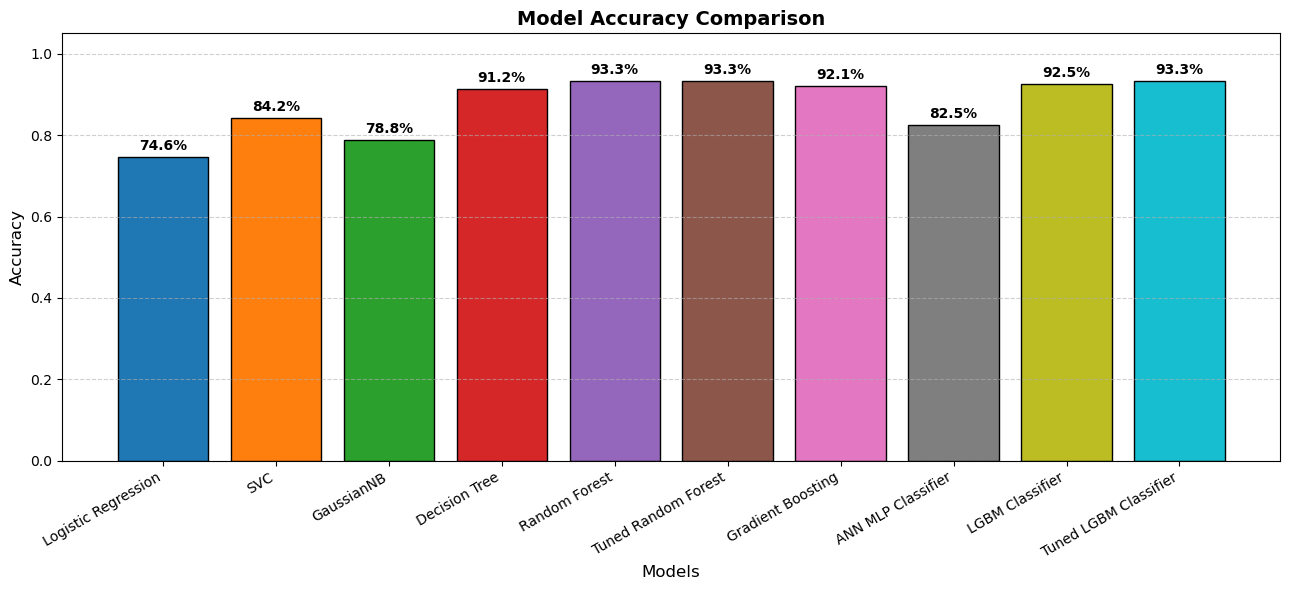

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# ---- Predictions dictionary (MAKE SURE THESE EXIST) ----
predictions = {
    "Logistic Regression": y_pred_lr,
    "SVC": y_pred_svc,
    "GaussianNB": y_pred_gnb,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Tuned Random Forest": y_pred_rft,
    "Gradient Boosting": y_pred_gb,
    "ANN MLP Classifier": y_pred_mlp,
    "LGBM Classifier": y_pred_lgbm,
    "Tuned LGBM Classifier": y_pred_lgbmt
}

# ---- Metric containers ----
accuracy = []
precision = []
recall = []
f1 = []

# ---- Compute metrics ----
for name, y_pred in predictions.items():
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1s, _ = precision_recall_fscore_support(
        y_test, y_pred, average='weighted'
    )
    
    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1.append(f1s)

# ---- Plot Accuracy Comparison ----
colors = cm.tab10(np.linspace(0, 1, len(predictions)))

plt.figure(figsize=(13,6))
bars = plt.bar(predictions.keys(), accuracy, color=colors, edgecolor='black')

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h + 0.01,
        f"{h*100:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Model Selection

Multiple machine learning models were trained and evaluated for predicting employee performance. Among all models, the hyperparameter-tuned Random Forest achieved the highest accuracy along with stable cross-validation performance. Due to its robustness, interpretability, and consistent results, the tuned Random Forest model was selected as the final model.

## Saving The Final Model

In [84]:
import joblib

# Save the tuned Random Forest model
joblib.dump(rft_model, 'final_random_forest_model.pkl')

print("Final Random Forest model saved successfully.")

Final Random Forest model saved successfully.


## Conclusion

In this project, employee performance data was analyzed to identify key factors influencing performance ratings. Exploratory Data Analysis revealed that factors such as salary hike percentage, work-life balance, and environment satisfaction play an important role in employee performance.

Multiple machine learning models were implemented and compared, including Logistic Regression, Decision Tree, Support Vector Machine, Random Forest, Gradient Boosting, ANN, and LightGBM. After hyperparameter tuning and cross-validation, the Random Forest model demonstrated the best overall performance in terms of accuracy, stability, and generalization.

The final tuned Random Forest model was selected and saved for future prediction, making it suitable for real-world employee performance evaluation and decision-making.

## Project Summary & Conclusion

In this project, employee performance data was analyzed to understand key factors influencing performance ratings and to build a predictive model. The data was preprocessed, explored through EDA, and multiple machine learning models were trained and evaluated. Hyperparameter tuning and cross-validation were applied to improve and validate model performance. The tuned Random Forest classifier was selected as the final model due to its high accuracy and stable performance. The model was saved and successfully used to predict employee performance ratings, demonstrating its readiness for real-world deployment and decision support.